# Importando as Libs 

In [2]:
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

# Importando o dataset
para inserir o conceito de sazonalidade precisamos do mês e do ano daquele respectivo registro, para tal, extrairemos essa informação do nome do arquivo e criaremos uma coluna p/ o mês e outra p/ o ano.

In [7]:
meses = {'jan': 1, 'fev':2, 'mar':3, 'abr': 4, 'mai':5, 'jun': 6, 
         'jul': 7, 'ago': 8, 'set':9, 'out': 10, 'nov': 11, 'dez':12}

caminho_bases = pathlib.Path('dataset')
base_airbnb = pd.DataFrame()

for arquivo in caminho_bases.iterdir():
    nome_mes = arquivo.name[:3]
    mes = meses[nome_mes]
    
    ano = arquivo.name[-8:]
    ano = int(ano.replace('.csv', ''))
    
    df = pd.read_csv(caminho_bases / arquivo.name, low_memory = False)
    df['ano'] = ano
    df['mes'] = mes
    base_airbnb = base_airbnb.append(df)    

In [9]:
display(base_airbnb)

id                            listing_url       scrape_id  \
0         14063     https://www.airbnb.com/rooms/14063  20180414160018   
1         17878     https://www.airbnb.com/rooms/17878  20180414160018   
2         24480     https://www.airbnb.com/rooms/24480  20180414160018   
3         25026     https://www.airbnb.com/rooms/25026  20180414160018   
4         31560     https://www.airbnb.com/rooms/31560  20180414160018   
...         ...                                    ...             ...   
34324  38844730  https://www.airbnb.com/rooms/38844730  20190923212307   
34325  38846408  https://www.airbnb.com/rooms/38846408  20190923212307   
34326  38846703  https://www.airbnb.com/rooms/38846703  20190923212307   
34327  38847050  https://www.airbnb.com/rooms/38847050  20190923212307   
34328  38847655  https://www.airbnb.com/rooms/38847655  20190923212307   

      last_scraped                                          name  \
0       2018-04-14                          Living in a Postcard   
1       2018-04-14             Very Nice 2Br - Copacabana - WiFi   
2       2018-04-14              Nice and cozy near Ipanema Beach   
3       2018-04-14     Beautiful Modern Decorated Studio in Copa   
4       2018-04-14              NICE & COZY 1BDR - IPANEMA BEACH   
...            ...                                           ...   
34324   2019-09-24             TRANSAMERICA BARRA DA TIJUCA R IV   
34325   2019-09-24                      Alugo para o Rock in Rio   
34326   2019-09-24  Apt COMPLETO em COPACABANA c/TOTAL SEGURANÇA   
34327   2019-09-24                     Cobertura Cinematografica   
34328   2019-09-24     Quarto em cobertura em frente à praia III   

                                                 summary  \
0      Besides the most iconic's view, our apartment ...   
1      Please note that special rates apply for New Y...   
2      My studio is located in the best  of Ipanema. ...   
3      Our apartment is a little gem, everyone loves ...   
4      This nice and clean 1 bedroom apartment is loc...   
...                                                  ...   
34324  Em estilo contemporâneo, o Transamerica Prime ...   
34325  Confortável apartamento, 2 quartos , sendo 1 s...   
34326  Apartamento quarto e sala COMPLETO para curtas...   
34327                               Cobertura alto nivel   
34328  Quarto em cobertura quadriplex com vista lindí...   

                                                   space  \
0                                                    NaN   
1      - large balcony which looks out on pedestrian ...   
2      The studio is located at Vinicius de Moraes St...   
3      This newly renovated studio (last renovations ...   
4      This nice and clean 1 bedroom apartment is loc...   
...                                                  ...   
34324                                                NaN   
34325  O apartamento estará com mobília completa disp...   
34326  Espaço ideal para até 5 pessoas. Cama de casal...   
34327                                                NaN   
34328                                                NaN   

                                             description experiences_offered  \
0      Besides the most iconic's view, our apartment ...                none   
1      Please note that special rates apply for New Y...                none   
2      My studio is located in the best  of Ipanema. ...                none   
3      Our apartment is a little gem, everyone loves ...                none   
4      This nice and clean 1 bedroom apartment is loc...                none   
...                                                  ...                 ...   
34324  Em estilo contemporâneo, o Transamerica Prime ...                none   
34325  Confortável apartamento, 2 quartos , sendo 1 s...                none   
34326  Apartamento quarto e sala COMPLETO para curtas...                none   
34327                               Cobertura alto nivel         

# Engenharia de Atributos
Nessa seção removeremos os atributos que não necessitamos para construir o modelo. Seja removendo ou transformando os dados importados.

In [10]:
#exportando as 1000 primeiras entradas para csv
base_airbnb.head(1000).to_csv('primeiros_registros.csv', sep=';')

In [20]:
#colunas selecionadas
colunas = ['host_response_time','host_response_rate', 'host_is_superhost', 'host_listings_count',
           'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
           'bedrooms', 'beds', 'bed_type','amenities', 'price', 'security_deposit', 'cleaning_fee', 
           'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
           'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
           'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable',
           'is_business_travel_ready', 'ano', 'mes']

base_airbnb = base_airbnb.loc[:, colunas]

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['host_response_time', 'host_response_rate', 'security_deposit',\n       'cleaning_fee', 'review_scores_rating',\n       ...\n       'review_scores_cleanliness', 'review_scores_checkin',\n       'review_scores_communication', 'review_scores_location',\n       'review_scores_value'],\n      dtype='object', length=11). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [21]:
display(base_airbnb)

host_is_superhost  host_listings_count   latitude  longitude  \
0                     f                  1.0 -22.946854 -43.182737   
1                     t                  2.0 -22.965919 -43.178962   
2                     f                  1.0 -22.985698 -43.201935   
3                     f                  3.0 -22.977117 -43.190454   
4                     t                  1.0 -22.983024 -43.214270   
...                 ...                  ...        ...        ...   
34324                 f                  0.0 -23.003180 -43.342840   
34325                 f                  0.0 -22.966640 -43.393450   
34326                 f                 32.0 -22.962080 -43.175520   
34327                 f                  0.0 -23.003400 -43.341820   
34328                 f                  5.0 -23.010560 -43.363350   

      property_type        room_type  accommodates  bathrooms  bedrooms  beds  \
0         Apartment  Entire home/apt             4        1.0       0.0   2.0   
1       Condominium  Entire home/apt             5        1.0       2.0   2.0   
2         Apartment  Entire home/apt             2        1.0       1.0   1.0   
3         Apartment  Entire home/apt             3        1.0       1.0   2.0   
4         Apartment  Entire home/apt             3        1.0       1.0   2.0   
...             ...              ...           ...        ...       ...   ...   
34324     Apartment  Entire home/apt             4        1.0       0.0   2.0   
34325     Apartment  Entire home/apt             4        2.0       2.0   3.0   
34326     Apartment  Entire home/apt             5        1.0       1.0   2.0   
34327     Apartment  Entire home/apt             4        1.0       1.0   1.0   
34328     Apartment     Private room             2        0.0       1.0   1.0   

       ... guests_included extra_people minimum_nights  maximum_nights  \
0      ...               2       $34.00             60             365   
1      ...               2       $51.00              4              90   
2      ...               2      $215.00              3              90   
3      ...               2       $45.00              4              30   
4      ...               2       $68.00              2            1125   
...    ...             ...          ...            ...             ...   
34324  ...               2       $50.00              1            1125   
34325  ...               1        $0.00              2            1125   
34326  ...               3       $30.00              3            1125   
34327  ...               1        $0.00              1            1125   
34328  ...               2       $80.00              1              30   

      number_of_reviews  instant_bookable  is_business_travel_ready  \
0                    38                 f                         f   
1                   205                 t                         f   
2                    85                 f                         f   
3                   208                 f                         f   
4                   200                 t                         f   
...                 ...               ...                       ...   
34324                 0                 f                         f   
34325                 0                 f                         f   
34326                 0                 f                         f   
34327                 0                 f                         f   
34328                 0                 f                         f   

               cancellation_policy   ano mes  
0      strict_14_with_grace_period  2018   4  
1                           strict  2018   4  
2                           strict  2018   4  
3                           strict  2018   4  
4                           strict  2018   4  
...                            ...   ...  ..  
34324                     flexible  2019   9  
34325                     flexible  2019   9  
34326  strict_14_with_grace

In [22]:
for coluna in base_airbnb:
    #verificando a quantidade de NAN nas colunas
    if base_airbnb[coluna].isnull().sum() > 300000:
        #se uma coluna possuir mais de 300k de nan, ele é deletada
        base_airbnb = base_airbnb.drop(coluna, axis=1)

In [23]:
print(base_airbnb.isnull().sum())

host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
ano                         0
mes                         0
dtype: int64


In [24]:
#excluindo vazios
base_airbnb = base_airbnb.dropna()
#quantidade de linhas e colunas
print(base_airbnb.shape)
#quantidade de nulls em cada coluna
print(base_airbnb.isnull().sum())

(897709, 23)
host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
ano                         0
mes                         0
dtype: int64


In [30]:
colunas = ['latitude', 'longitude', 'property_type', 
           'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 
           'price', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
           'is_business_travel_ready', 'ano', 'mes']

base_airbnb = base_airbnb.loc[:, colunas]

In [31]:
display(base_airbnb)

latitude  longitude property_type        room_type  accommodates  \
0     -22.946854 -43.182737     Apartment  Entire home/apt             4   
1     -22.965919 -43.178962   Condominium  Entire home/apt             5   
2     -22.985698 -43.201935     Apartment  Entire home/apt             2   
3     -22.977117 -43.190454     Apartment  Entire home/apt             3   
4     -22.983024 -43.214270     Apartment  Entire home/apt             3   
...          ...        ...           ...              ...           ...   
34324 -23.003180 -43.342840     Apartment  Entire home/apt             4   
34325 -22.966640 -43.393450     Apartment  Entire home/apt             4   
34326 -22.962080 -43.175520     Apartment  Entire home/apt             5   
34327 -23.003400 -43.341820     Apartment  Entire home/apt             4   
34328 -23.010560 -43.363350     Apartment     Private room             2   

       bathrooms  bedrooms  beds  bed_type  \
0            1.0       0.0   2.0  Real Bed   
1            1.0       2.0   2.0  Real Bed   
2            1.0       1.0   1.0  Real Bed   
3            1.0       1.0   2.0  Real Bed   
4            1.0       1.0   2.0  Real Bed   
...          ...       ...   ...       ...   
34324        1.0       0.0   2.0  Real Bed   
34325        2.0       2.0   3.0  Real Bed   
34326        1.0       1.0   2.0  Real Bed   
34327        1.0       1.0   1.0  Real Bed   
34328        0.0       1.0   1.0  Real Bed   

                                               amenities    price  \
0      {TV,Internet,"Air conditioning",Kitchen,Doorma...  $133.00   
1      {TV,"Cable TV",Internet,Wifi,"Air conditioning...  $270.00   
2      {TV,"Cable TV",Wifi,"Air conditioning","First ...  $222.00   
3      {TV,"Cable TV",Internet,Wifi,"Air conditioning...  $161.00   
4      {TV,"Cable TV",Internet,Wifi,"Air conditioning...  $222.00   
...                                                  ...      ...   
34324  {TV,Wifi,"Air conditioning",Pool,Kitchen,"Free...  $121.00   
34325  {TV,Wifi,"Air conditioning",Pool,Kitchen,"Free...  $799.00   
34326  {TV,Wifi,"Air conditioning",Kitchen,Elevator,W...  $420.00   
34327  {TV,Wifi,"Air conditioning",Pool,Kitchen,"Free...  $250.00   
34328  {TV,Kitchen,"Free parking on premises","Smokin...   $92.00   

       guests_included extra_people  minimum_nights  maximum_nights  \
0                    2       $34.00              60             365   
1                    2       $51.00               4              90   
2                    2      $215.00               3              90   
3                    2       $45.00               4              30   
4                    2       $68.00               2            1125   
...                ...          ...             ...             ...   
34324                2       $50.00               1            1125   
34325                1        $0.00               2            1125   
34326                3       $30.00               3            1125   
34327                1        $0.00               1            1125   
34328                2       $80.00               1              30   

      is_business_travel_ready   ano  mes  
0                            f  2018    4  
1                            f  2018    4  
2                            f  2018    4  
3                            f  2018    4  
4                            f  2018    4  
...                        ...   ...  ...  
34324                        f  2019    9  
34325                        f  2019    9  
34326                        f  2019    9  
34327                        f  2019    9  
34328                        f  2019    9  

[897709 rows x 18 columns]

In [33]:
#verificando tipagem
print(base_airbnb.dtypes)
print('-'*60)
print(base_airbnb.iloc[0])

latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
is_business_travel_ready     object
ano                           int64
mes                           int64
dtype: object
------------------------------------------------------------
latitude                                                           -22.946854
longitude                                                          -43.182737
property_type                                                       Apartment
room_type                                  

In [38]:
#price e extra_people estão como objeto
#temos que transformar
#price
base_airbnb['price'] = base_airbnb['price'].str.replace('$', '')
base_airbnb['price'] = base_airbnb['price'].str.replace(',', '')
base_airbnb['price'] = base_airbnb['price'].astype(np.float32, copy=False)
#extra_people
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$', '')
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace(',', '')
base_airbnb['extra_people'] = base_airbnb['extra_people'].astype(np.float32, copy=False)

<ipython-input-38-0ac5ef9be48f>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  base_airbnb['price'] = base_airbnb['price'].str.replace('$', '')
<ipython-input-38-0ac5ef9be48f>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$', '')


In [39]:
print(base_airbnb.iloc[0])

latitude                                                           -22.946854
longitude                                                          -43.182737
property_type                                                       Apartment
room_type                                                     Entire home/apt
accommodates                                                                4
bathrooms                                                                 1.0
bedrooms                                                                  0.0
beds                                                                      2.0
bed_type                                                             Real Bed
amenities                   {TV,Internet,"Air conditioning",Kitchen,Doorma...
price                                                                   133.0
guests_included                                                             2
extra_people                                                    

# Análise Exploratória
Analisaremos a correlação entre os atributos e detectaremos outliers
->  Excluir outliers (usaremos como regra, valores abaixo de Q1 - (1.5 x Amplitude) e valores
acima de Q3 + (1.5x Amplitude)). Amplitude = Q3 - Q1


<AxesSubplot:>

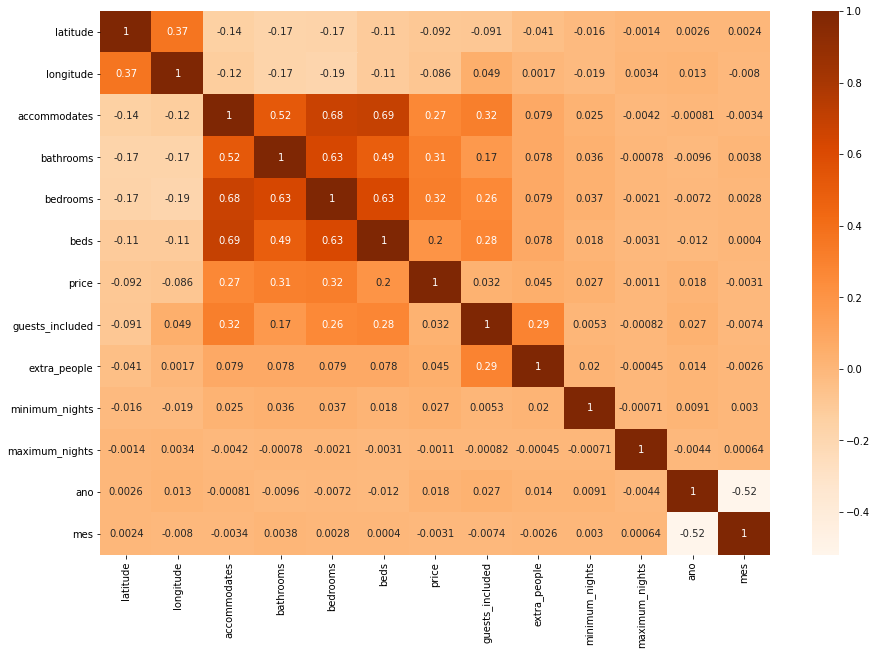

In [40]:
plt.figure(figsize=(15, 10))
sns.heatmap(base_airbnb.corr(), annot=True, cmap='Oranges')

In [41]:
#dada uma coluna retorna os limites superiores e inferiores, destacando possíveis outliers
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return (q1 - 1.5 * amplitude, q3 + 1.5 * amplitude)

In [42]:
#dado o dataframe e a coluna pertencente à este dataframe, exluirá os registros que nao
    #estiverem dentro dos valores limitantes
def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df, linhas_removidas

In [43]:
def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)

def histograma(coluna):
    plt.figure(figsize=(15, 5))
    sns.distplot(coluna, hist=True)
    
def grafico_barra(coluna):
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
    ax.set_xlim(limites(coluna))

## Price 

/home/lcspaiva/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


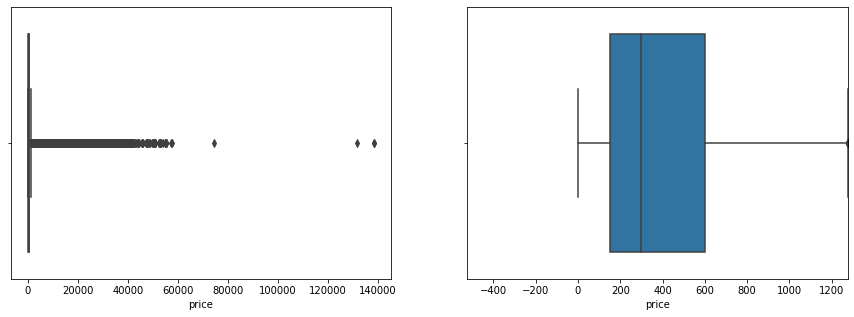

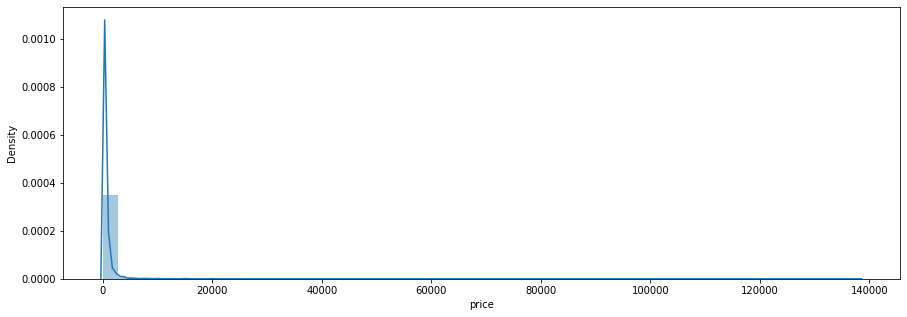

In [44]:
diagrama_caixa(base_airbnb['price'])
histograma(base_airbnb['price'])

In [84]:
'''Como estamos construindo um modelo para imóveis comuns, acredito que os valores acima do
limite superior serão apenas de apartamentos de altíssimo luxo, que não é o nosso objetivo
principal. Por isso, podemos excluir esses outliers.
'''
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'price')
print('{} linhas removidas'.format(linhas_removidas))

52801 linhas removidas


/home/lcspaiva/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



(623844, 16)


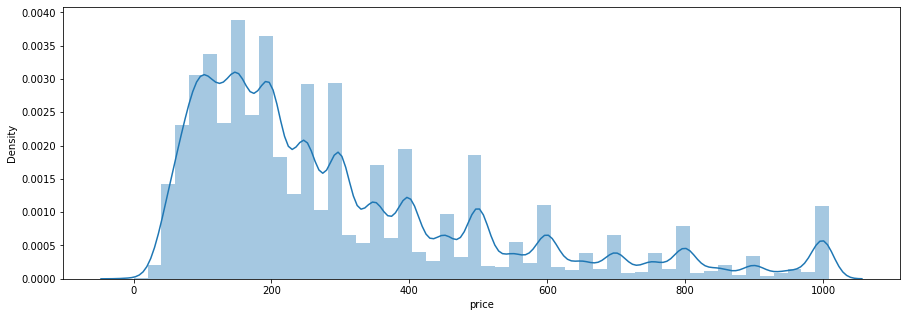

In [85]:
histograma(base_airbnb['price'])
print(base_airbnb.shape)

## Extra_people 

/home/lcspaiva/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


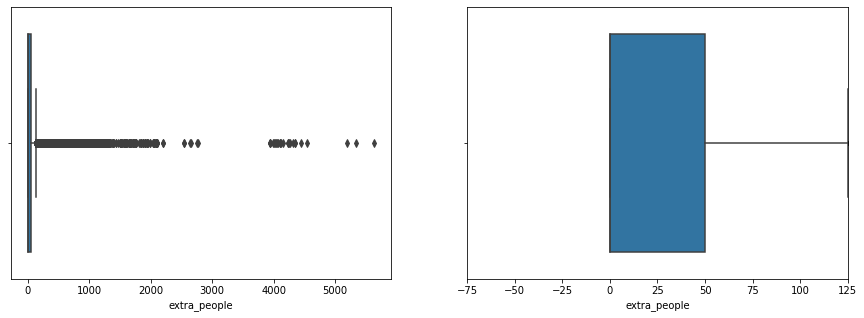

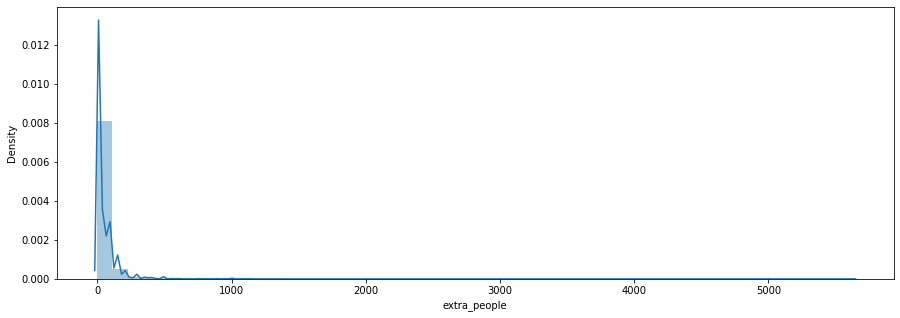

In [45]:
diagrama_caixa(base_airbnb['extra_people'])
histograma(base_airbnb['extra_people'])

In [48]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'extra_people')
print('{} linhas removidas'.format(linhas_removidas))

69763 linhas removidas


/home/lcspaiva/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(827946, 18)


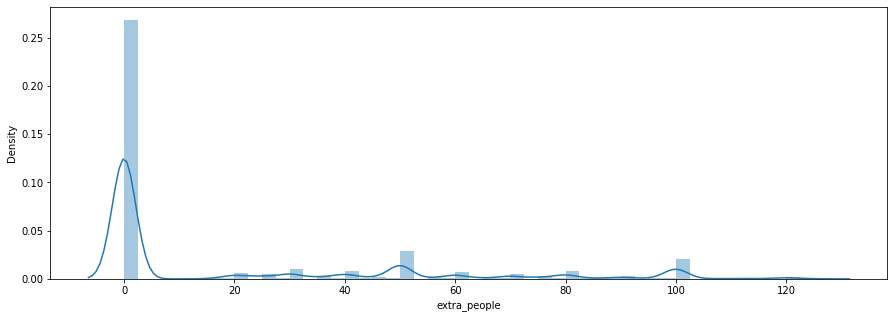

In [49]:
histograma(base_airbnb['extra_people'])
print(base_airbnb.shape)

## host_listings_cout (excluí)

In [50]:
diagrama_caixa(base_airbnb['host_listings_count'])
grafico_barra(base_airbnb['host_listings_count'])

KeyError: 'host_listings_count'

In [ ]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'host_listings_count')
print('{} linhas removidas'.format(linhas_removidas))

## accommodates

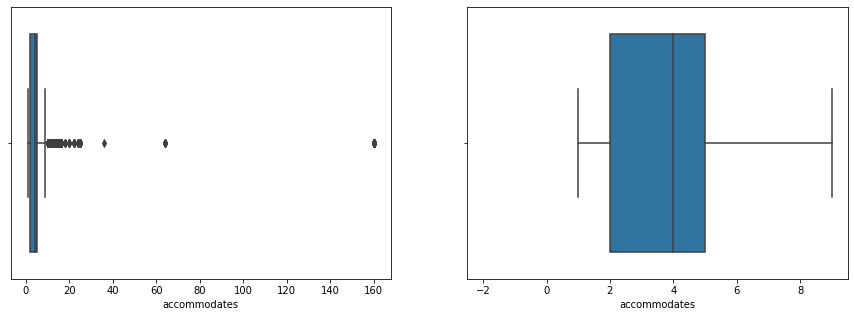

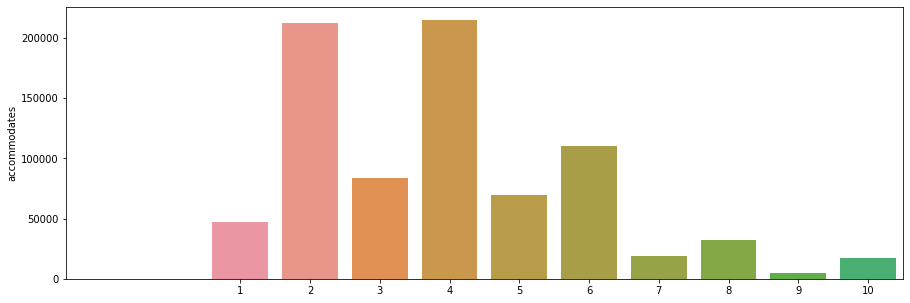

In [51]:
diagrama_caixa(base_airbnb['accommodates'])
grafico_barra(base_airbnb['accommodates'])

In [59]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'accommodates')
print('{} linhas removidas'.format(linhas_removidas))

33926 linhas removidas


## bathrooms

<AxesSubplot:ylabel='bathrooms'>

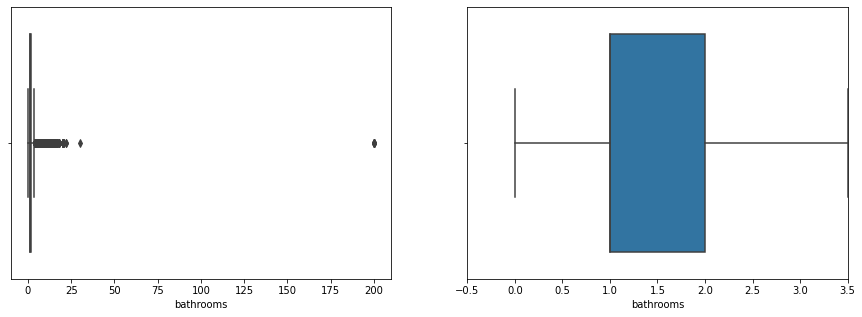

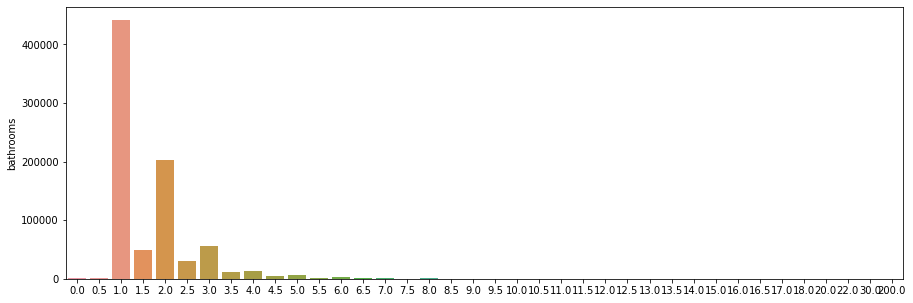

In [55]:
diagrama_caixa(base_airbnb['bathrooms'])
plt.figure(figsize=(15, 5))
sns.barplot(x=base_airbnb['bathrooms'].value_counts().index, y=base_airbnb['bathrooms'].value_counts())

In [60]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'bathrooms')
print('{} linhas removidas'.format(linhas_removidas))

17644 linhas removidas


## bedrooms 

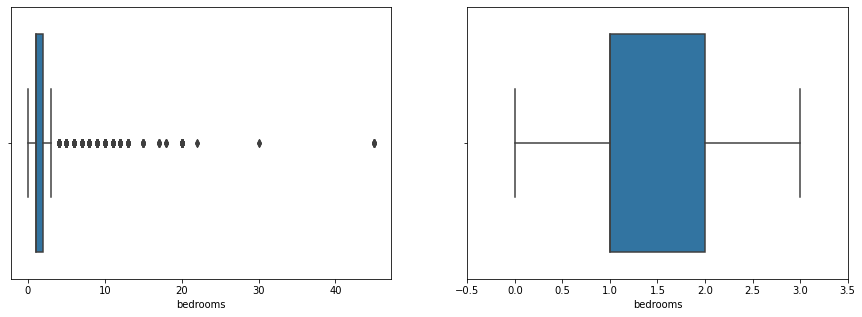

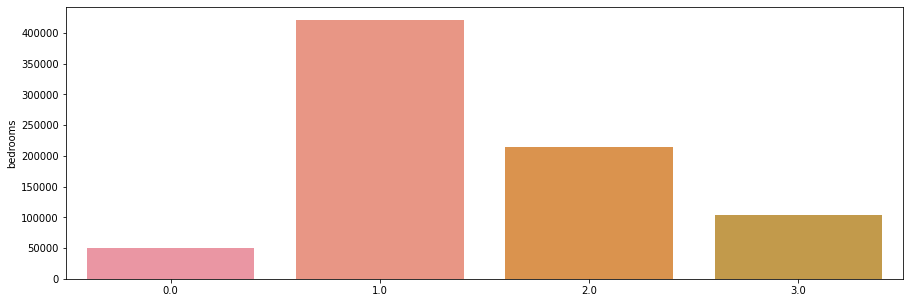

In [56]:
diagrama_caixa(base_airbnb['bedrooms'])
grafico_barra(base_airbnb['bedrooms'])

In [61]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'bedrooms')
print('{} linhas removidas'.format(linhas_removidas))

10711 linhas removidas


## beds 

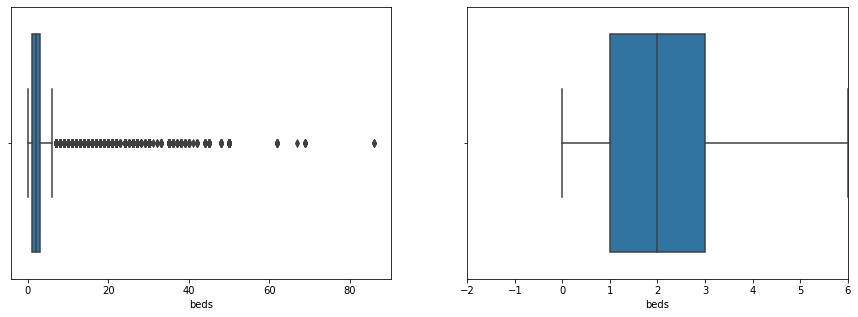

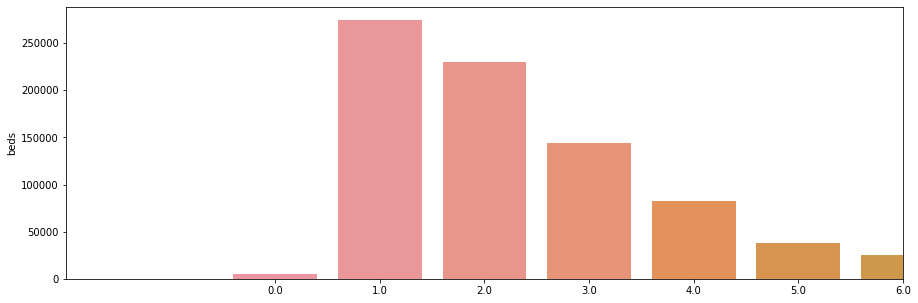

In [57]:
diagrama_caixa(base_airbnb['beds'])
grafico_barra(base_airbnb['beds'])

In [62]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'beds')
print('{} linhas removidas'.format(linhas_removidas))

7791 linhas removidas


## guests_included 

(1.0, 1.0)


<AxesSubplot:ylabel='guests_included'>

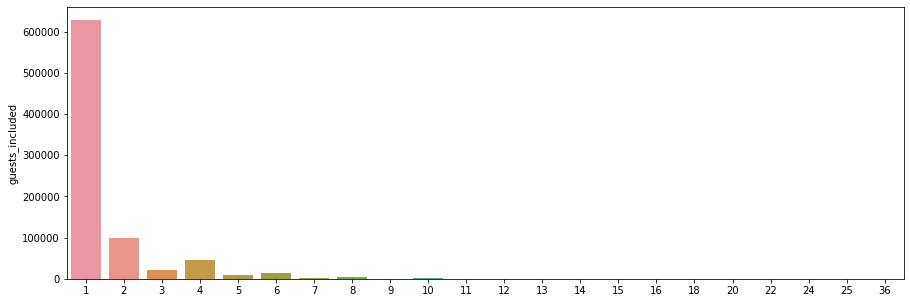

In [58]:
print(limites(base_airbnb['guests_included']))
plt.figure(figsize=(15, 5))
sns.barplot(x=base_airbnb['guests_included'].value_counts().index, y=base_airbnb['guests_included'].value_counts())

Vamos remover essa feature da análise. Parece que os usuários do airbnb usam muito o valor
padrão do airbnb como 1 guest included. Isso pode levar o nosso modelo a considerar uma feature
que na verdade não é essencial para a definição do preço, por isso, me parece melhor excluir a
coluna da análise

In [63]:
base_airbnb = base_airbnb.drop('guests_included', axis=1)
base_airbnb.shape

(757874, 17)

## minimum_nights

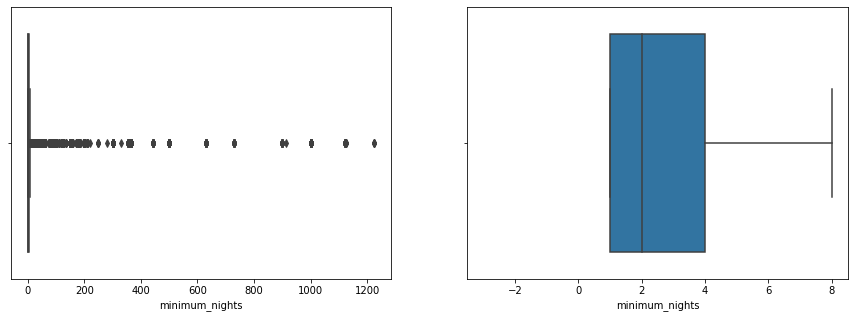

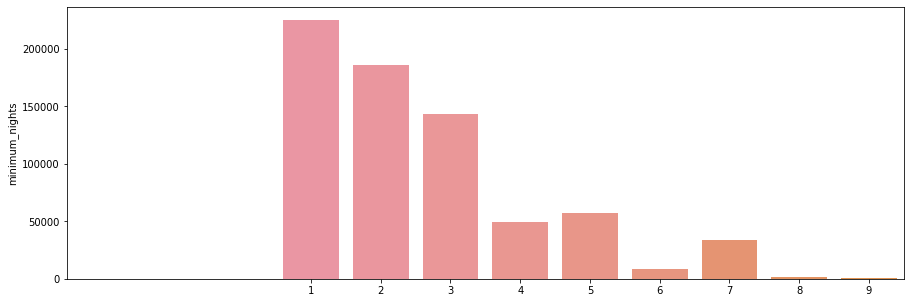

In [64]:
diagrama_caixa(base_airbnb['minimum_nights'])
grafico_barra(base_airbnb['minimum_nights'])

Estamos querendo um modelo que ajude a precificar apartamentos comuns como uma pessoa
comum gostaria de disponibilizar. No caso, apartamentos com mais de 8 noites como o
"mínimo de noites" podem ser apartamentos de temporada ou ainda apartamentos para morar,
em que o host exige pelo menos 1 mês no apartamento.

In [65]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'minimum_nights')
print('{} linhas removidas'.format(linhas_removidas))

53096 linhas removidas


## maximun_nights 

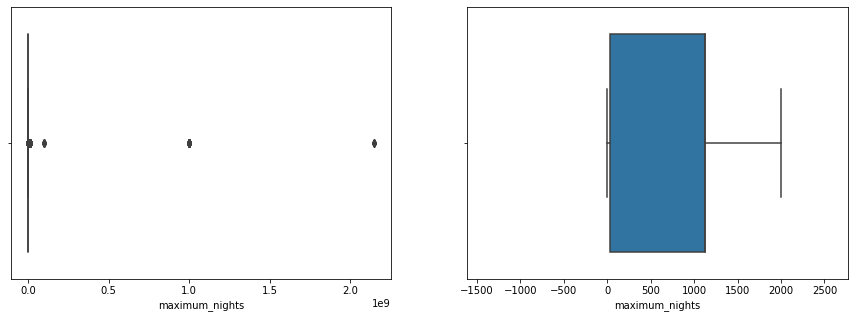

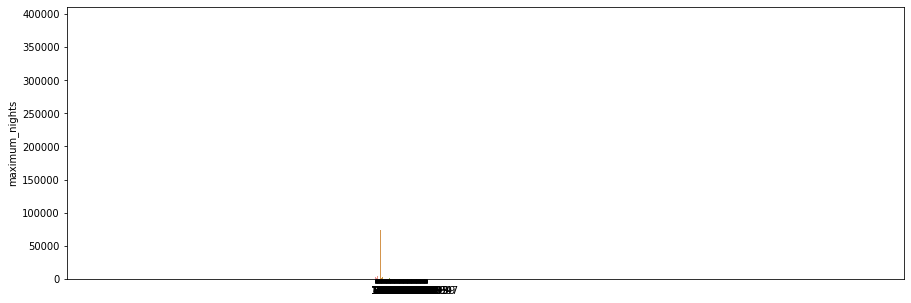

In [66]:
diagrama_caixa(base_airbnb['maximum_nights'])
grafico_barra(base_airbnb['maximum_nights'])

quase todos os hosts não preenchem esse campo de maximum nights,
então ele não parece que vai ser um fator relevante.
Excluiremos essa coluna da análise

In [68]:
base_airbnb = base_airbnb.drop('maximum_nights', axis=1)
base_airbnb.shape

(704778, 16)

## number_of_reviews (excluí)

In [69]:
diagrama_caixa(base_airbnb['number_of_reviews'])
grafico_barra(base_airbnb['number_of_reviews'])

KeyError: 'number_of_reviews'

In [ ]:
base_airbnb = base_airbnb.drop('number_of_reviews', axis=1)
base_airbnb.shape

## Tratando Colunas de Texto

### property_type 

Apartment                 556181
House                      59291
Condominium                31453
Serviced apartment         17511
Loft                       13930
Bed and breakfast           4384
Guest suite                 4180
Hostel                      3360
Other                       2560
Guesthouse                  2486
Villa                       1405
Hotel                       1372
Aparthotel                  1231
Townhouse                   1167
Boutique hotel               570
Tiny house                   518
Chalet                       517
Earth house                  485
Boat                         339
Casa particular (Cuba)       318
Cottage                      274
Bungalow                     227
Dorm                         196
Cabin                        141
Castle                       140
Nature lodge                 131
Treehouse                     76
Island                        54
Hut                           40
Campsite                      34
Resort    

/home/lcspaiva/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


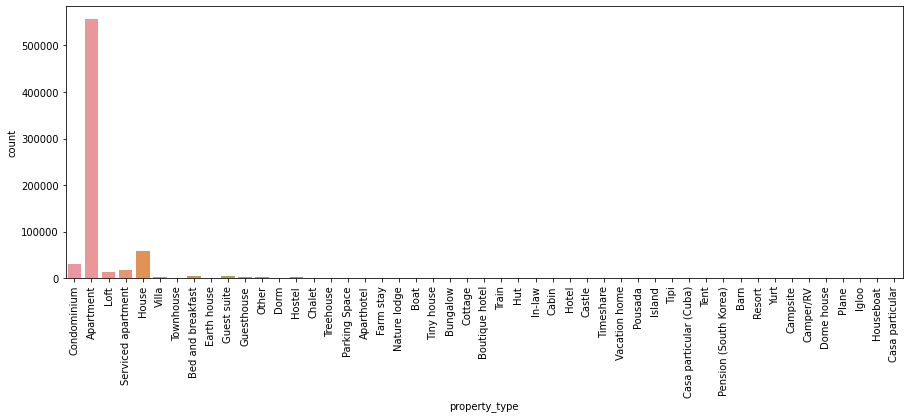

In [70]:
print(base_airbnb['property_type'].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot('property_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

Caso a classe tenha menos de 2.000 propriedades na base de dados, agruparemos em um grupo chamado "outros".

['Villa', 'Hotel', 'Aparthotel', 'Townhouse', 'Boutique hotel', 'Tiny house', 'Chalet', 'Earth house', 'Boat', 'Casa particular (Cuba)', 'Cottage', 'Bungalow', 'Dorm', 'Cabin', 'Castle', 'Nature lodge', 'Treehouse', 'Island', 'Hut', 'Campsite', 'Resort', 'Camper/RV', 'Yurt', 'Tent', 'Tipi', 'Barn', 'Farm stay', 'Pension (South Korea)', 'Vacation home', 'Dome house', 'Parking Space', 'In-law', 'Igloo', 'Train', 'Pousada', 'Houseboat', 'Timeshare', 'Casa particular', 'Plane']
Apartment             556181
House                  59291
Condominium            31453
Serviced apartment     17511
Loft                   13930
Outros                  9442
Bed and breakfast       4384
Guest suite             4180
Hostel                  3360
Other                   2560
Guesthouse              2486
Name: property_type, dtype: int64


/home/lcspaiva/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


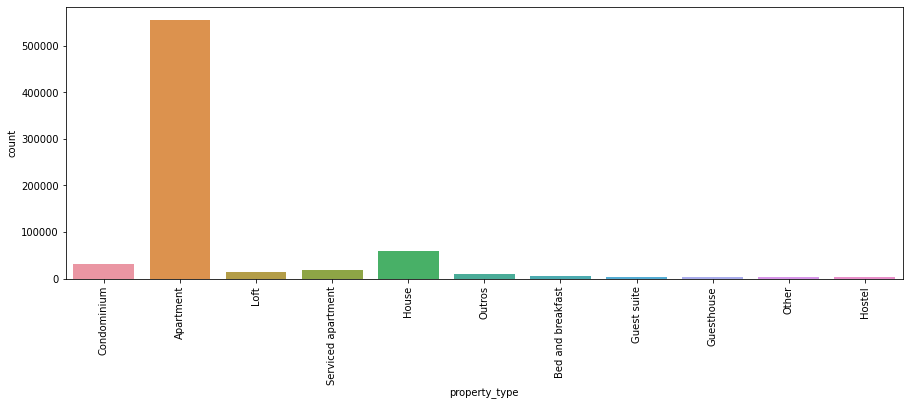

In [73]:
tabela_tipos_casa = base_airbnb['property_type'].value_counts()
colunas_agrupar = []

for tipo in tabela_tipos_casa.index:
    if tabela_tipos_casa[tipo] < 2000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)    

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['property_type']==tipo, 'property_type'] = 'Other'

print(base_airbnb['property_type'].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot('property_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

### room_type

Entire home/apt    476161
Private room       212384
Shared room         14250
Hotel room           1983
Name: room_type, dtype: int64


/home/lcspaiva/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


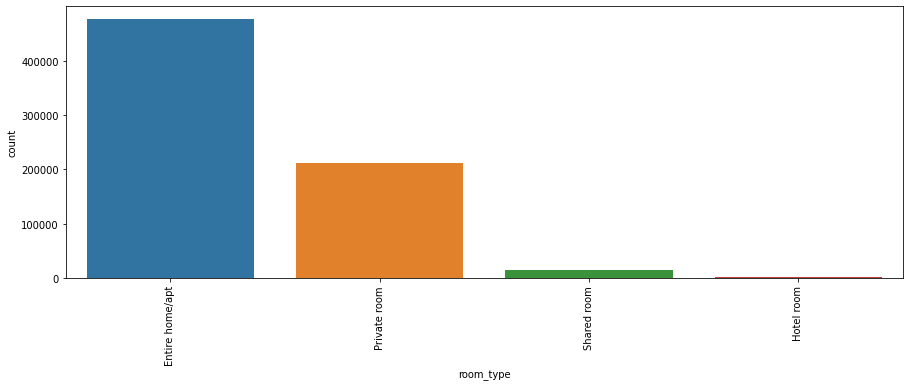

In [74]:
print(base_airbnb['room_type'].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot('room_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

### bed_type 

Real Bed         692777
Pull-out Sofa      8395
Futon              1795
Airbed             1223
Couch               588
Name: bed_type, dtype: int64


/home/lcspaiva/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


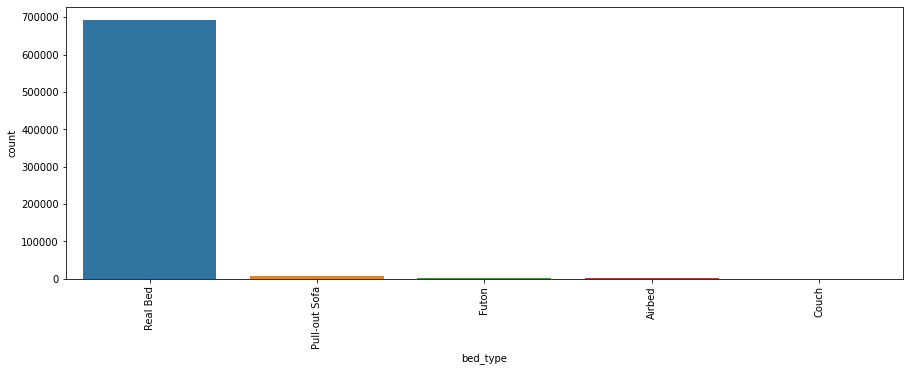

In [75]:
print(base_airbnb['bed_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('bed_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

Como temos 1 valor claramente MUITO maior do que todos os outros, vou criar apenas 2
grupos de camas: "Real Bed" e "outros"

['Pull-out Sofa', 'Futon', 'Airbed', 'Couch']
Real Bed    692777
Outros       12001
Name: bed_type, dtype: int64


/home/lcspaiva/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


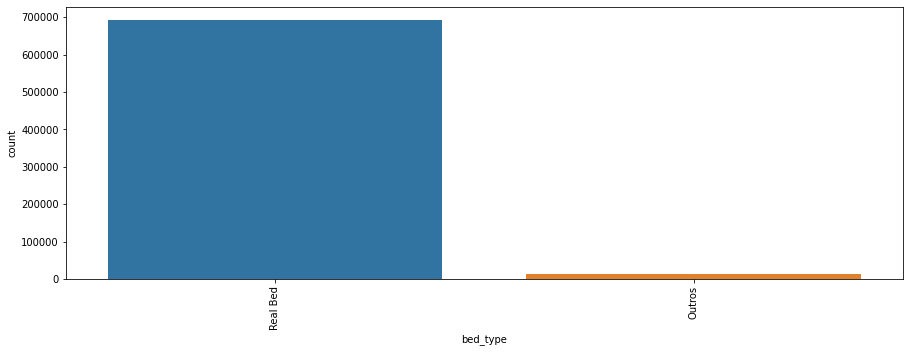

In [76]:
# agrupando categorias de bed_type
tabela_bed = base_airbnb['bed_type'].value_counts()
colunas_agrupar = []
for tipo in tabela_bed.index:
    if tabela_bed[tipo] < 10000:
        colunas_agrupar.append(tipo)
        
print(colunas_agrupar)
for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['bed_type']==tipo, 'bed_type'] = 'Outros'
    
print(base_airbnb['bed_type'].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot('bed_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

### cancellation_policy (excluí) 

In [77]:
print(base_airbnb['cancellation_policy'].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot('cancellation_policy', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

KeyError: 'cancellation_policy'

In [ ]:
# agrupando categorias de cancellation_pollicy
tabela_cancellation = base_airbnb['cancellation_policy'].value_counts()
colunas_agrupar = []
for tipo in tabela_cancellation.index:
    if tabela_cancellation[tipo] < 10000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['cancellation_policy']==tipo, 'cancellation_policy'] = 'strict'
print(base_airbnb['cancellation_policy'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('cancellation_policy', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

### amenities 
Como temos uma diversidade muito grande de amenities e, às vezes, as mesmas amenities podem
ser escritas de forma diferente, vamos avaliar a quantidade de amenities como o parâmetro para o
nosso modelo.

In [78]:
print(base_airbnb['amenities'].iloc[1].split(','))
print(len(base_airbnb['amenities'].iloc[1].split(',')))

base_airbnb['n_amenities'] = base_airbnb['amenities'].str.split(',').apply(len)

['{TV', '"Cable TV"', 'Internet', 'Wifi', '"Air conditioning"', 'Kitchen', 'Doorman', 'Elevator', '"Buzzer/wireless intercom"', '"Family/kid friendly"', 'Hangers', '"Hair dryer"', 'Iron', '"Laptop friendly workspace"}']
14


In [79]:
base_airbnb = base_airbnb.drop('amenities', axis=1)
base_airbnb.shape

(704778, 16)

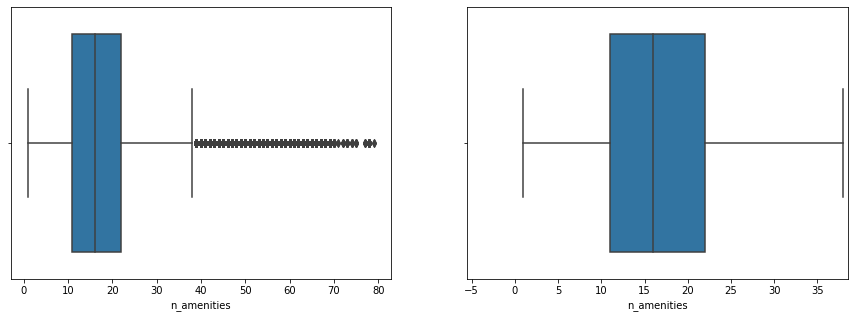

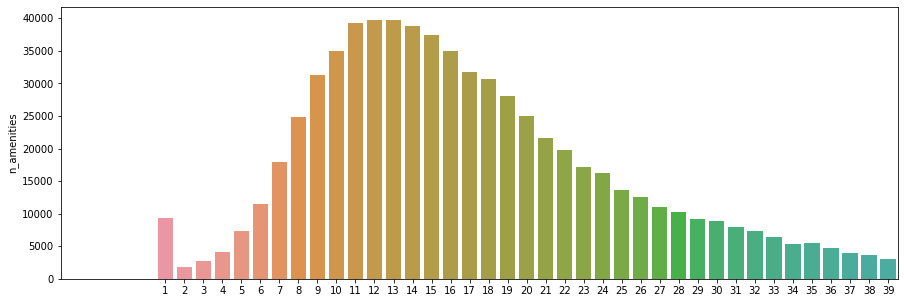

In [80]:
diagrama_caixa(base_airbnb['n_amenities'])
grafico_barra(base_airbnb['n_amenities'])

In [81]:
#removendo outliers
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'n_amenities')
print('{} linhas removidas'.format(linhas_removidas))

28133 linhas removidas


###  Visualização de Mapa das Propriedades
Vamos criar um mapa que exibe um pedaço da nossa base de dados aleatório (50.000
propriedades) para ver como as propriedades estão distribuídas pela cidade e também identificar os
locais de maior preço


In [86]:
amostra = base_airbnb.sample(n=50000)
centro_mapa = {'lat':amostra.latitude.mean(), 'lon':amostra.longitude.mean()}
mapa = px.density_mapbox(amostra, lat='latitude', lon='longitude',z='price', radius=2.5,
                        center=centro_mapa, zoom=10,
                        mapbox_style='stamen-terrain')
mapa.show()

## Encoding
* transformar t e f em 1 e 0
* colunas texto em 1 e 0

In [88]:
# colunas_tf = ['host_is_superhost', 'instant_bookable', 'is_business_travel_ready'] excluí
colunas_tf = ['is_business_travel_ready']
base_airbnb_cod = base_airbnb.copy()
for coluna in colunas_tf:
    base_airbnb_cod.loc[base_airbnb_cod[coluna]=='t', coluna] = 1
    base_airbnb_cod.loc[base_airbnb_cod[coluna]=='f', coluna] = 0

In [90]:
#colunas_categorias = ['property_type', 'room_type', 'bed_type', 'cancellation_policy'] #excluí
colunas_categorias = ['property_type', 'room_type', 'bed_type'] 
base_airbnb_cod = pd.get_dummies(data=base_airbnb_cod, columns=colunas_categorias)
display(base_airbnb_cod.head())

latitude  longitude  accommodates  bathrooms  bedrooms  beds  price  \
1 -22.965919 -43.178962             5        1.0       2.0   2.0  270.0   
3 -22.977117 -43.190454             3        1.0       1.0   2.0  161.0   
4 -22.983024 -43.214270             3        1.0       1.0   2.0  222.0   
5 -22.988165 -43.193588             3        1.5       1.0   2.0  308.0   
6 -22.981269 -43.190457             2        1.0       1.0   2.0  219.0   

   extra_people  minimum_nights is_business_travel_ready  ...  \
1          51.0               4                        0  ...   
3          45.0               4                        0  ...   
4          68.0               2                        0  ...   
5          86.0               2                        0  ...   
6          80.0               3                        0  ...   

   property_type_Loft  property_type_Other  property_type_Outros  \
1                   0                    0                     0   
3                   0                    0                     0   
4                   0                    0                     0   
5                   0                    0                     0   
6                   1                    0                     0   

   property_type_Serviced apartment  room_type_Entire home/apt  \
1                                 0                          1   
3                                 0                          1   
4                                 0                          1   
5                                 0                          1   
6                                 0                          1   

   room_type_Hotel room  room_type_Private room  room_type_Shared room  \
1                     0                       0                      0   
3                     0                       0                      0   
4                     0                       0                      0   
5                     0                       0                      0   
6                     0                       0                      0   

   bed_type_Outros  bed_type_Real Bed  
1                0                  1  
3                0                  1  
4                0                  1  
5                0                  1  
6                0                  1  

[5 rows x 30 columns]

# Modelo de Previsão
* Métricas de Avaliação
Vamos usar aqui o R² que vai nos dizer o quão bem o nosso modelo consegue explicar o preço. Isso
seria um ótimo parâmetro para ver o quão bom é nosso modelo
-> Quanto mais próximo de 100%, melhor
Vou calcular também o Erro Quadrático Médio, que vai mostrar para gente o quanto o nosso
modelo está errando.
-> Quanto menor for o erro, melhor

In [91]:
def avaliar_modelo(nome_modelo, y_teste, previsao):
    r2 = r2_score(y_teste, previsao)
    RSME = np.sqrt(mean_squared_error(y_teste, previsao))
    return f'Modelo {nome_modelo}:\nR²:{r2:.2%}\nRSME:{RSME:.2f}'

In [92]:
modelo_rf = RandomForestRegressor()
modelo_lr = LinearRegression()
modelo_et = ExtraTreesRegressor()

modelos = {'RandomForest': modelo_rf,
           'LinearRegression': modelo_lr,
           'ExtraTrees': modelo_et,
            }

y = base_airbnb_cod['price']
X = base_airbnb_cod.drop('price', axis=1)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
for nome_modelo, modelo in modelos.items():
    #treinar
    modelo.fit(X_train, y_train)
    #testar
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))

Modelo RandomForest:
R²:96.52%
RSME:42.40
Modelo LinearRegression:
R²:30.27%
RSME:189.83
Modelo ExtraTrees:
R²:96.85%
RSME:40.35


0
latitude                          0.140683
longitude                         0.137120
n_amenities                       0.114634
bedrooms                          0.112249
extra_people                      0.084394
accommodates                      0.074307
room_type_Entire home/apt         0.071540
bathrooms                         0.071265
minimum_nights                    0.061580
beds                              0.058246
ano                               0.016349
property_type_Apartment           0.011941
mes                               0.008132
property_type_House               0.006964
property_type_Condominium         0.005542
room_type_Private room            0.004464
bed_type_Real Bed                 0.002829
bed_type_Outros                   0.002823
property_type_Outros              0.002675
property_type_Serviced apartment  0.002524
property_type_Loft                0.002244
room_type_Shared room             0.002131
property_type_Other               0.001326
property_type_Bed and breakfast   0.001177
property_type_Hostel              0.001001
property_type_Guest suite         0.000765
property_type_Guesthouse          0.000698
room_type_Hotel room              0.000395
is_business_travel_ready          0.000000

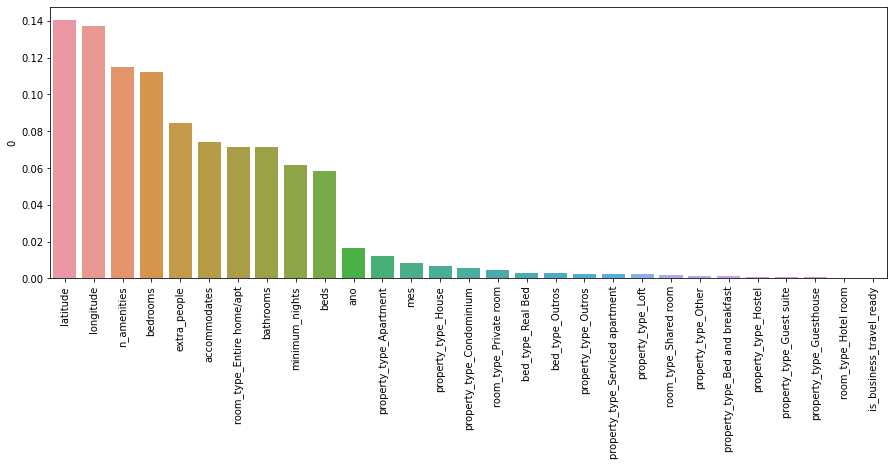

In [94]:
#Peso dos atributos
importancia_features = pd.DataFrame(modelo_et.feature_importances_, X_train.columns)
importancia_features = importancia_features.sort_values(by=0, ascending=False)
display(importancia_features)
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=importancia_features.index, y=importancia_features[0])
ax.tick_params(axis='x', rotation=90)